In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.animation as animation

# 回帰
### 回帰とは
**回帰**とは 教師あり学習に分類される機械学習手法で、与えられたデータ(**説明変数**)から実数値を予測する手法である。またこの章で取り扱うのはその中でも説明変数が1次の**単回帰**と呼ばれるもので、説明変数が高次になると**重回帰**と呼ばれ、これは次章に取り扱う。単回帰では**回帰直線**を求め予測を行う。

###　残差
単回帰を実装するにあたって「残差」を導入する。
今以下のような５つの事例を持つデータ$D$がある
$$ 
D = \{(x_{i}, y_{i})\}_{i=1}^{N}= \{(4, 15), (6, 8), (5, 17), (8, 15), (3, 1)\} 
$$
ここで１次関数$\epsilon_{i}$モデル$\hat{y} = ax + b$のa、bを$a = 2, b = 1$に設定して回帰直線を考える。
また$\hat{y}$は目的変数をモデルに適用し計算された予測値を表す。

データ$D$の各点$(x_{i}, y_{i})$とモデルで計算される点$(x, \hat{y})$を以下にプロットする

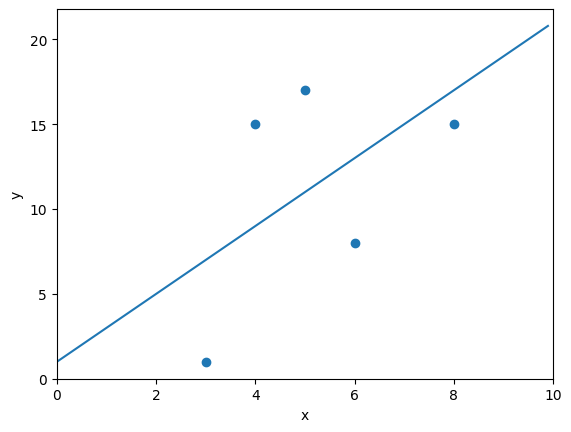

In [2]:
data = np.array([[4, 15], [6, 8], [5, 17], [8, 15], [3, 1]])

x = np.arange(0, 10, 0.1)
y = 2 * x  + 1

plt.plot(x, y)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 10)
plt.yticks([0, 5, 10, 15, 20])
plt.show()


上図は１例であるが、a、bの値を変えることで様々な回帰直線ができる。しかし、設定したa、ｂがどのくらいデータにあっているかを定量的にみる必要がある。そこで使用するのが残差である。残差とは求めた予測値と実測値とのずれを表す数値で上図では各点と直線との距離に値する。よって残差の計算式は以下のようになる。(ここでは残差を$\epsilon$で表し、データ$D$の$i$番目の要素に対応する残差を$	\epsilon_{i}$としている。)
$$ 
\epsilon_{i} = y_{i} - \hat{y}_{i} 
$$
したがって以下のような計算になる。
$$
\left\{ 
\begin{array}{l}
\displaystyle  \epsilon_{1} = y_{2} - \hat{y}_{1} = 15 - 9 = 6\\
\epsilon_{2} = y_{2} - \hat{y}_{2} = 8 - 13 = -5\\
\epsilon_{3} = y_{3} - \hat{y}_{3} = 17 - 11 = 6\\ 
\epsilon_{4} = y_{4} - \hat{y}_{4} = 15 - 17 = -2\\ 
\epsilon_{5} = y_{5} - \hat{y}_{5} = 1 - 7 = -6\\ 
\end{array} 
\right .
$$
これで各事例の残差は計算できたのでデータ$D$の残差について考える。単純に各事例の残差を合計し、そこから平均をとっても、残差の正負で($\epsilon_{1}$と$\epsilon_{3}$のように)打ち消しあう可能性がある。また各事例の残差の絶対値をとってから平均を計算すると数学的な処理が困難になる。したがって2乗和の平均をとる**平均二乗誤差**を用いる。
$$
 \hat{L} = \displaystyle \frac{1}{N}\sum_{n = 1}^{N}\epsilon_{i} ^ 2 = \displaystyle \frac{1}{N}\sum_{n = 1}^{N}(y_{i} - \hat{y}_{i}) ^ 2
$$
データ$D$で計算すると
$$
\hat{L} = \displaystyle \frac{1}{5}\sum_{n = 1}^{5}\epsilon_{i} ^ 2 = \frac{1}{5}\{6 ^ 2 + (-5) ^ 2 + 6 ^ 2 + (-2) ^ 2 + (-6) ^ 2\} = 27.4
$$ 


### 最小二乗法
前節で述べたようにa、bの値を変えることで様々な回帰直線を描くことができる。つまり平均二乗誤差はa、bの値によるのでデータに最適な回帰直線を得たいときは、平均二乗誤差を最小にするようなa、bの値を決める必要がある。また平均二乗誤差のようにモデルの出力値(予測値)と真の値(実測値)との誤差を表す関数を**損失関数**や**目的関数**というが、目的関数の方が広い意味で使用される。単回帰モデルの目的関数は平均二乗誤差の定義から以下のようになる。
$$
\begin{align}
\hat{L}(a, b) &= \displaystyle \frac{1}{N}\sum_{n = 1}^{\N}\epsilon_{i} ^ 2 \notag \\
&= \displaystyle \frac{1}{N}\sum_{n = 1}^{N}(y_{i} - \hat{y}_{i}) ^ 2 \notag \\
&= \displaystyle \frac{1}{N}\sum_{n = 1}^{N}\{y_{i} - (ax_{i} + b)\} ^ 2 \notag 
\end{align}
$$
このように誤差の2乗和を最小化してパラメータを求めることを**最小二乗法**という。
ではこの目的関数を最小化することを考える。目的関数の式からも分かるようにa、bの２次関数で下に凸であるため、a、bについて微分しそれを0とおきそれを解くことになる。つまり下式を解くことになる。
$$
\left \{ 
\begin{array}{l}
\displaystyle \frac{\partial \hat{L}(a, b)}{\partial a} = 0 \\
\displaystyle \frac{\partial \hat{L}(a, b)}{\partial b} = 0 \\
\end{array}
\right .
$$
まずbについて、
$$
\displaystyle \frac{\partial \hat{L}(a, b)}{\partial b} = \frac{2}{N}\sum_{n=1}^{\N}2 ・(y_{i} - ax_{i} - b)(-1) = 0 \\
\begin{align}
\displaystyle \therefore  \frac{1}{N}\sum_{n=1}^{N}(y_{i} - ax_{i} - b) &= 0 \notag \\
\displaystyle \frac{1}{N}(\sum_{n=1}^{N}y_{i} - a\sum_{n=1}^{N}{x_{i}} - Nb) &= 0 \notag  \\
\displaystyle b &= \frac{1}{N}(\sum_{n=1}^{N}y_{i} - a\sum_{n=1}^{N}x_{i}) \notag \\
\displaystyle b &= \bar{y} - a\bar{x} \notag 
\end{align} 
$$
またaについても、
$$
\frac{\partial \hat{L}(a, b)}{\partial a} = \frac{2}{N}\sum_{n=1}^{\N}2 ・(y_{i} - ax_{i} - b)(-x_{i}) = 0 \\
\begin{align}
\displaystyle \therefore  \frac{1}{N}\sum_{n=1}^{\N}x_{i}(y_{i} - ax_{i} - b) &= 0 \notag \\
\displaystyle \frac{1}{N}(\sum_{n=1}^{N}x_{i}y_{i} -a\sum_{n=1}^{N}x_{i} ^ 2 -b\sum_{n=1}^{N}x_{i}) &= 0 \notag \\
\displaystyle \bar{xy} - a\bar{x^2} - b\bar{x} &= 0 \notag \\
\displaystyle \bar{xy} - a\bar{x^2} - \bar{x}(\bar{y} - a\bar{x}) &= 0 \notag \\
\displaystyle a &= \frac{\bar{xy} - \bar{x}\bar{y}}{\bar{x^2} - \bar{x}^2} \notag \\
\end{align}
$$
よって単回帰でのパラメータを求める式は、
$$
a = \frac{\bar{xy} - \bar{x}\bar{y}}{\bar{x^2} - \bar{x}^2}, 
b = \bar{y} - a\bar{x} 
$$


# 確認課題
単回帰のパラメータを求める式を実装してください。その際scikit-learnなどのライブラリを使用せずに実装してください。